# K-Means on Wine

## In class

1. Try to understand the notebook first, then ...
2. Apply K-means on your own dataset

  - Pick from any where, or use one in https://scikit-learn.org/stable/datasets/index.html
  - Describe the dataset you pick

3. Find the right "K" (try to justify your decision)
4. Report the results (make it short)

**Write a report as a PDF (including screen shots if needed).**



## Load the wine dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

# Wine data
# 178 samples with 3 distinct varieties of red wine: Barolo, Grignolino and Barbera
# Features measure chemical composition e.g. alcohol content
# https://archive.ics.uci.edu/ml/datasets/Wine
url = 'https://raw.githubusercontent.com/wichadak/wine/master/wine.data'
df = pd.read_csv(url, header=None)
df.sample(frac=1).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
31,1,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515
55,1,13.56,1.73,2.46,20.5,116,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120
76,2,13.03,0.90,1.71,16.0,86,1.95,2.03,0.24,1.46,4.60,1.19,2.48,392
129,2,12.04,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465


In [ ]:
X = df[df.columns[1:]].to_numpy(dtype=np.float32)
y = df[df.columns[0]].to_numpy()
print('X:', X.shape, X.dtype)
print('y:', y.shape, y.dtype)

X: (178, 13) float32
y: (178,) int64


## Cluster it!

In [ ]:
from sklearn.cluster import KMeans
# again we know that it has 3 classes
model = KMeans(n_clusters=3)
model.fit(X)
y_pred = model.predict(X)
print(y_pred.shape)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(178,)


### Assesing the clustering quality

If we have ground truth labels, we can use a method called "Adjusted Rand Index" (best = 1, worst ~ 0 or -1).

Read more: https://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index

In [ ]:
from sklearn import metrics
print('ARI:', metrics.adjusted_rand_score(y, y_pred))

ARI: 0.37111371823084754


### Better clustering quality with input normalization

Because K-means make assumption that features should have equal variances.

We should standardize the input before clustering.

Read more: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
_X = scaler.fit_transform(X)
print('before mean and sd:', X[:,0].mean(), X[:,0].std())
print('after mean and sd:', _X[:,0].mean(), _X[:,0].std())

model = KMeans(n_clusters=3)
# using the normalized X
model.fit(_X)
y_pred = model.predict(_X)
print('ARI after normalized:', metrics.adjusted_rand_score(y, y_pred))

before mean and sd: 13.000619 0.8095429
after mean and sd: -2.1430884e-08 1.0


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ARI after normalized: 0.8974949815093207


#### Don't even need to zero the mean

In [ ]:
# don't even need to zero the mean!
scaler = StandardScaler(with_mean=False, with_std=True)
_X = scaler.fit_transform(X)
print('before mean and sd:', X[:,0].mean(), X[:,0].std())
print('after mean and sd:', _X[:,0].mean(), _X[:,0].std())

model = KMeans(n_clusters=3)
# using the normalized X
model.fit(_X)
y_pred = model.predict(_X)
print('ARI after normalized:', metrics.adjusted_rand_score(y, y_pred))

before mean and sd: 13.000619 0.8095429
after mean and sd: 16.059208 0.99999994
ARI after normalized: 0.8974949815093207


### Wrap as a pipeline

In [ ]:
# Pipelines combine multiple steps ** Wrap up the above as a pipeline
from sklearn.preprocessing import StandardScaler # MaxAbsScaler and Normalizer are other examples
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(X)
y_pred = pipeline.predict(X)
print('ARI:', metrics.adjusted_rand_score(y, y_pred))

ARI: 0.8974949815093207


# Selecting the "K" with Elbow method

In [ ]:
from tqdm import tqdm
# Run K-means for a set of k
distortions = []
models = []
K = range(1,10+1)
for k in tqdm(K):
    model = KMeans(n_clusters=k)
    model.fit(X)
    models.append(model)
    distortions.append(model.inertia_)

100%|██████████| 10/10 [00:00<00:00, 21.23it/s]


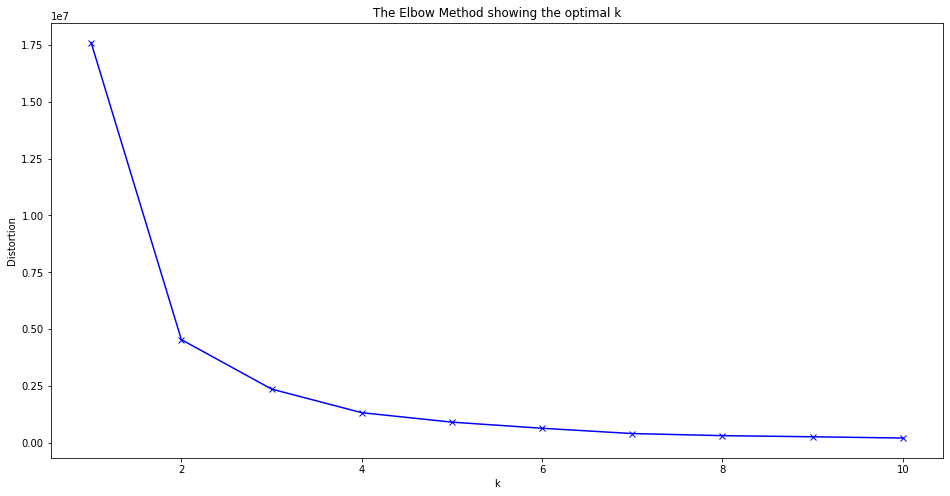

In [ ]:
#Plotting the distortions of K-Means
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()